In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
true_news=pd.read_csv("True.csv")
fake_news=pd.read_csv("Fake.csv")

In [3]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


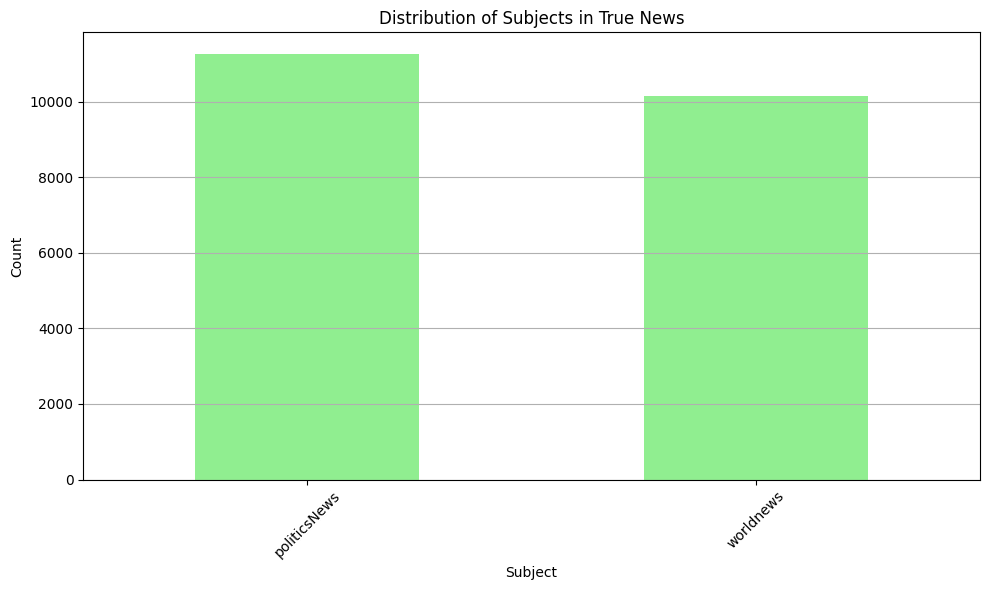

In [4]:
# Checking the distribution of subjects in true news
subject_counts = true_news['subject'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
subject_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Subjects in True News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [5]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


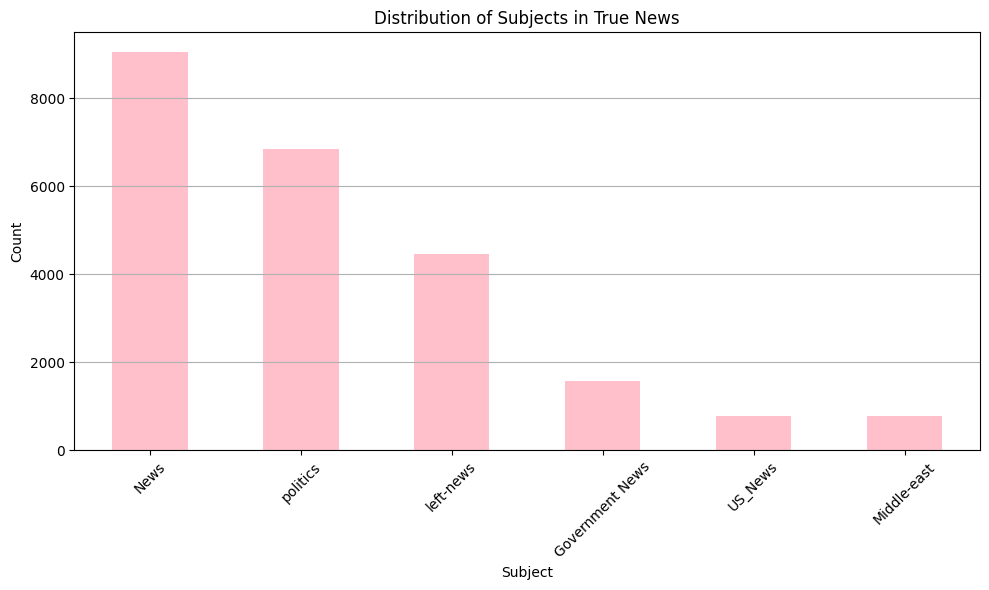

In [6]:
#checking the distribution of subjects in fake news
subject_counts = fake_news['subject'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
subject_counts.plot(kind='bar', color='pink')
plt.title('Distribution of Subjects in True News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [7]:
fake_news['class']=0
true_news['class']=1

In [8]:
fake_news.shape

(23481, 5)

In [9]:
true_news.shape

(21417, 5)

In [10]:
news_df=pd.concat([true_news, fake_news], axis = 0)
columns=news_df.columns

In [11]:
print(columns)

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')


In [12]:
news_df.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [13]:
news_df=news_df.drop(['date','subject'],axis=1)
news_df=news_df.sample(frac=1)

In [14]:
news_df.head()

,title,text,class
20850,"Indian journalists, activists protest murder o...","BENGALURU, India (Reuters) - Indian journalist...",1
13208,WOW! This Video Might Explain Why #UnfitHillar...,Notice at the beginning of the video where Joe...,0
15528,"Eyeing national vote, Berlusconi celebrates wi...","PALERMO, Italy (Reuters) - Former Italian Prim...",1
12998,Russian air strikes kill 21 in eastern Syria: ...,BEIRUT (Reuters) - Russian air strikes killed ...,1
13244,Lawyer for Egypt's ex-premier meets him at Cai...,CAIRO (Reuters) - Former Egyptian prime minist...,1


In [15]:
news_df.reset_index(inplace = True)

In [16]:
news_df.head()

,index,title,text,class
0,20850,"Indian journalists, activists protest murder o...","BENGALURU, India (Reuters) - Indian journalist...",1
1,13208,WOW! This Video Might Explain Why #UnfitHillar...,Notice at the beginning of the video where Joe...,0
2,15528,"Eyeing national vote, Berlusconi celebrates wi...","PALERMO, Italy (Reuters) - Former Italian Prim...",1
3,12998,Russian air strikes kill 21 in eastern Syria: ...,BEIRUT (Reuters) - Russian air strikes killed ...,1
4,13244,Lawyer for Egypt's ex-premier meets him at Cai...,CAIRO (Reuters) - Former Egyptian prime minist...,1


In [17]:
news_df=news_df.drop('index',axis=1)

In [18]:
random_values = news_df.sample(n=10)
random_values.to_csv('manual_testing.csv')
news_df=news_df.drop(random_values.index)

In [19]:
#cleaning the text and removing tokens that are not required
def clean_text(text):
    # Convert text to lowercase
    text=text.lower()
    # Remove square brackets and their content
    text=re.sub('\[.*?\]', '', text)
    # Remove non-word characters
    text=re.sub(r'[^\w\s]', '', text)
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove newlines
    text = text.replace('\n', '')
    # Remove words containing digits
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    
    return text


In [20]:
#remove stopwords from the text
def remove_stopwords(text):
    word=text.split()
    stop_words = set(stopwords.words('english'))
    filtered_text = ""
    for w in word:
        if w not in stop_words:
            filtered_text=filtered_text+" "+w;
            
    return filtered_text

In [21]:
#extract the root words
def lemmatised_words(text):
    word=text.split()
    lemmatizer = WordNetLemmatizer()
    lemmatized_sen=""
    for w in word:
        lemmatized_sen= lemmatized_sen+" "+lemmatizer.lemmatize(w)
        
    return lemmatized_sen

In [22]:
news_df['text']=news_df['text'].apply(clean_text)

In [24]:
news_df['text']=news_df['text'].apply(remove_stopwords)

In [26]:
news_df['text']=news_df['text'].apply(lemmatised_words)

In [28]:
X = news_df['text'].values
Y = news_df['class'].values

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [30]:
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

In [31]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(XV_train,Y_train)


DecisionTreeClassifier(random_state=0)

In [32]:
y_pred=dt.predict(XV_test)
# print(y_pred)

<Axes: title={'center': 'Confusion Matrix'}>

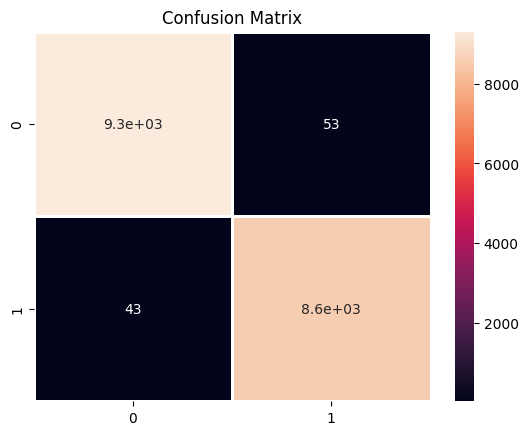

In [33]:
cm=confusion_matrix(Y_test,y_pred)
plt.title("Confusion Matrix")
sns.heatmap(pd.DataFrame(cm), annot=True,lw=2)

In [34]:
def classify_news(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(clean_text)
    new_def_test["text"] = new_def_test["text"].apply(remove_stopwords)
    new_def_test["text"] = new_def_test["text"].apply(lemmatised_words)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_DT = dt.predict(new_xv_test)
    return pred_DT
    